REQUIRED LIBRARIES

**1.IMPORT LIBRARIES**

In [104]:
# Basic
import pandas as pd
import numpy as np
import re

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ML & NLP
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

# Handling imbalance
from imblearn.over_sampling import RandomOverSampler

# Sparse matrix operations
from scipy.sparse import hstack

**2.LOAD DATASET**

In [105]:
data = pd.read_csv("fake_job_postings.csv")
print("File loaded successfully!")


File loaded successfully!


**2.1-DATA INFORMATION**

In [106]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

**2.2-DROP UNNECESSARY COLUMNS**

In [107]:
data.drop(columns=["job_id"], inplace=True)


**2.3-FRAUDULENT VALUE COUNTS**

In [108]:
data["fraudulent"].value_counts()


,count
fraudulent,
0,17014
1,866


**3-VISUALIZATION**

**3.1 – Fraudulent Distribution**

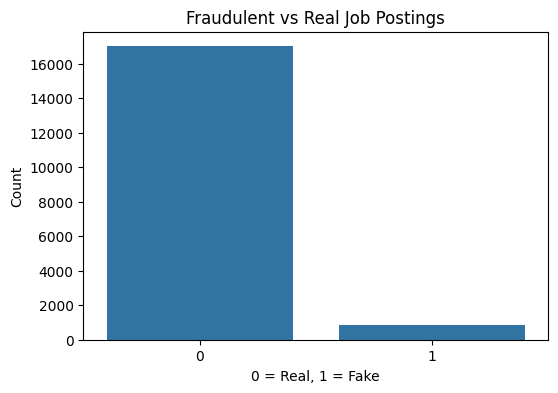

In [109]:
plt.figure(figsize=(6,4))
sns.countplot(x=data["fraudulent"])
plt.title("Fraudulent vs Real Job Postings")
plt.xlabel("0 = Real, 1 = Fake")
plt.ylabel("Count")
plt.show()



**3.2 – Location Feature**

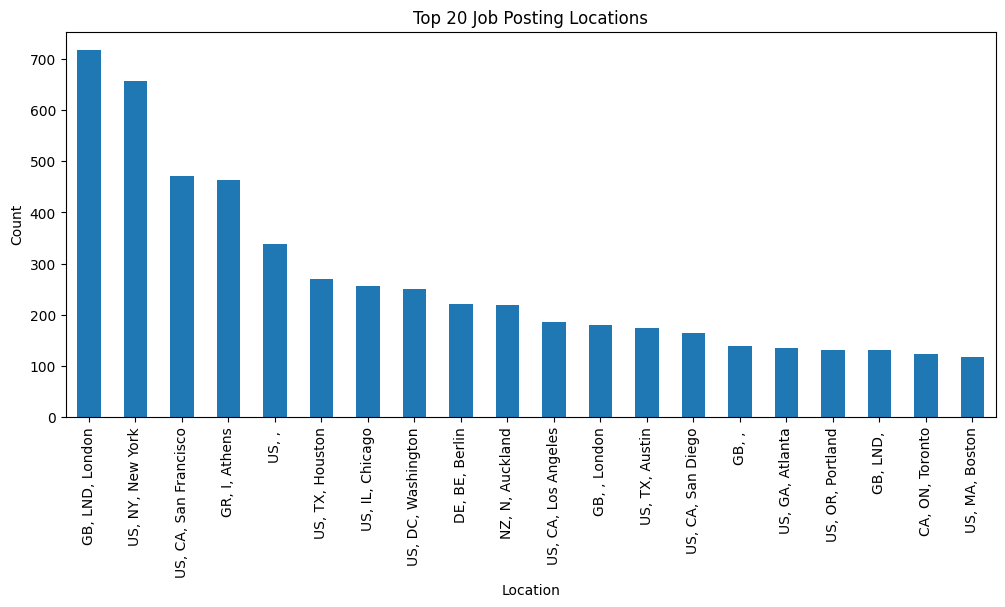

In [10]:
plt.figure(figsize=(12,5))
data["location"].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Job Posting Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()



**3.3 – Has Company Logo**

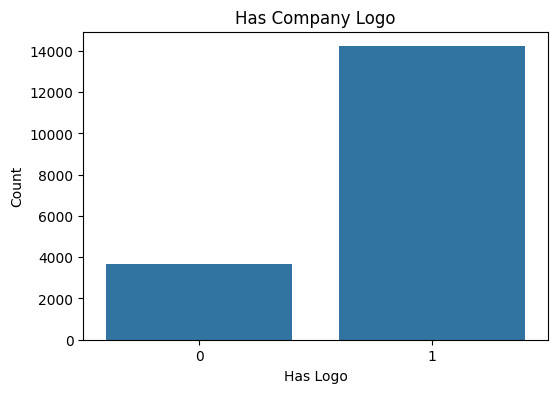

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=data["has_company_logo"])
plt.title("Has Company Logo")
plt.xlabel("Has Logo")
plt.ylabel("Count")
plt.show()

**3.4 – Has Questions**

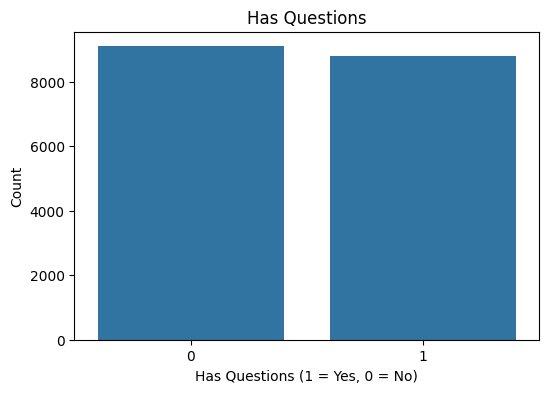

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x=data["has_questions"])
plt.title("Has Questions")
plt.xlabel("Has Questions (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


**3.5 – Employment Type**

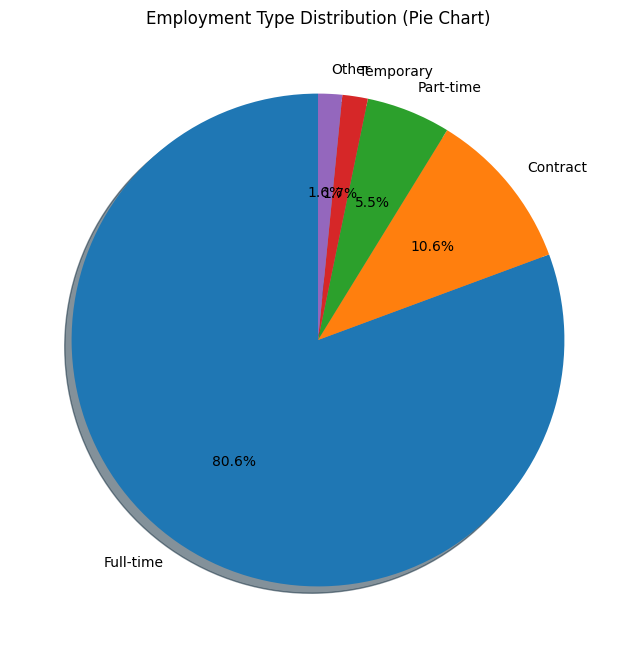

In [13]:
plt.figure(figsize=(8,8))

data["employment_type"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)

plt.title("Employment Type Distribution (Pie Chart)")
plt.ylabel("")  # removes unnecessary y-label
plt.show()


**4. Combine Important Text Columns**

In [14]:
text_cols = ["title", "company_profile", "description", "requirements", "benefits"]

for col in text_cols:
    data[col] = data[col].fillna("")

data["Making_desc"] = (
    data["title"] + " " +
    data["company_profile"] + " " +
    data["description"] + " " +
    data["requirements"] + " " +
    data["benefits"]
)


**5. Before Cleaning Text**

In [15]:
data["Making_desc"][0]


"Marketing Intern We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and cu

**6. Text Cleaning Function**

In [16]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z ]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

data["clean_text"] = data["Making_desc"].apply(clean_text)


**7. After Cleaning Text**

In [17]:
data["clean_text"][0]


'marketing intern we re food and we ve created a groundbreaking and award winning cooking site we support connect and celebrate home cooks and give them everything they need in one place we have a top editorial business and engineering team we re focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish well known professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random house food has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today show we re located in chelsea in new york city food a fast growing james beard award winning online food community and crowd sourced and curated recipe hub is currently 

**8. Most Frequent Words – WordClouds**

**8.1 WordCloud for Actual Jobs (fraudulent = 0)**

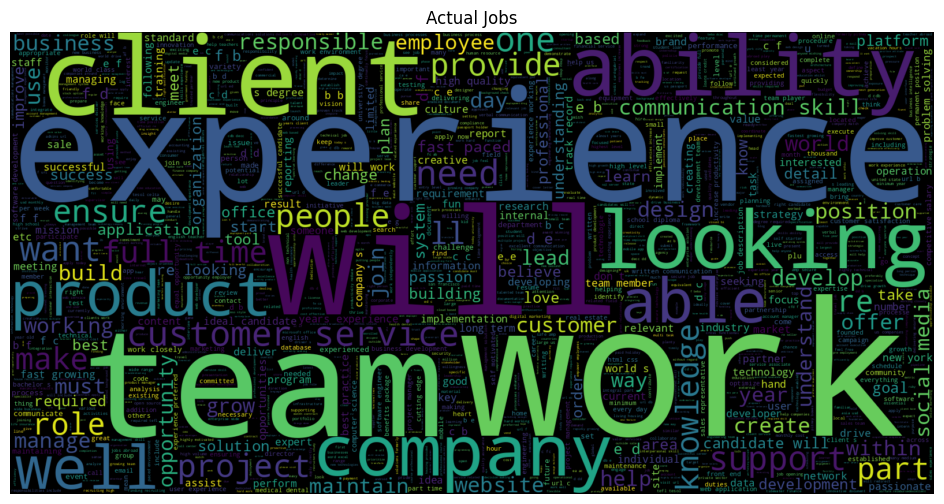

In [22]:
from wordcloud import WordCloud

actual_text = " ".join(data[data["fraudulent"] == 0]["clean_text"].astype(str))

wc = WordCloud(width=1600, height=800, max_words=3000).generate(actual_text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.title("Actual Jobs")
plt.axis("off")
plt.show()


**8.2 WordCloud for Fake Jobs (fraudulent = 1)**

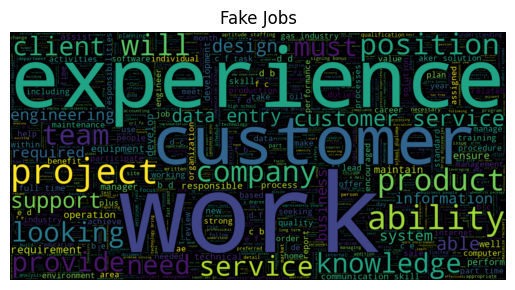

In [20]:
wc = WordCloud(width=1600, height=800, max_words=3000)\
     .generate(" ".join(data[data["fraudulent"] == 1].clean_text))

plt.imshow(wc, interpolation='bilinear')
plt.title("Fake Jobs")
plt.axis("off")
plt.show()


**TRAINING A MODEL**

**9.1-Create Numeric Scam Features**

In [74]:
# Character count feature
data["character_count"] = data["description"].astype(str).apply(len)

# Scam keyword ratio
scam_words = ["earn","money","free","click","fee","telegram",
              "whatsapp","urgent","registration","activation","process","processing"]

def scam_ratio(text):
    text = str(text).lower()
    return sum(w in text for w in scam_words)

data["ratio"] = data["description"].apply(scam_ratio)



**9.2-Combine Text Columns**

In [75]:
text_cols = ["title", "company_profile", "description", "requirements", "benefits"]

for col in text_cols:
    data[col] = data[col].fillna("")

data["text"] = data[text_cols].agg(" ".join, axis=1)


**9.3-Clean Text(EXCLUDING SPELLING MISTAKES)**

In [76]:
def clean_text(t):
    t = str(t).lower()
    t = re.sub(r"http\S+|www\S+", "", t)
    t = re.sub(r"[^a-zA-Z ]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

data["clean_text"] = data["text"].apply(clean_text)


**9.4-Select Features**

In [77]:
X_text = data["clean_text"]
X_num  = data[["telecommuting", "ratio", "character_count"]]
y = data["fraudulent"]


**9.5-Vectorize Text (CountVectorizer)**

In [78]:
count_vectorizer = CountVectorizer(stop_words="english")
X_count = count_vectorizer.fit_transform(X_text)


**9.6-Combine Text + Numeric Features**

In [79]:
X_full = hstack([X_count, X_num])


**9.7-FIX BIAS → Oversample Fake Jobs**

In [80]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_full, y)

print("Before:", y.value_counts().to_dict())
print("After:", pd.Series(y_resampled).value_counts().to_dict())


Before: {0: 17014, 1: 866}
After: {0: 17014, 1: 17014}


**10-Train/Test Split**

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.33,
    random_state=53,
    stratify=y_resampled
)


**10.1-Train Naive Bayes**

In [99]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)


**10.2-Train Logistic Regression (SGD)**

In [84]:
log_clf = SGDClassifier(loss="log_loss", random_state=53)
log_clf.fit(X_train, y_train)
pred_log = log_clf.predict(X_test)


**10.3-Final Combined Prediction**

In [85]:
final_pred = []
for a, b in zip(pred_nb, pred_log):
    final_pred.append(1 if (a == 1 or b == 1) else 0)


**10.4-EVALUATION**

In [103]:
print(" Accuracy       :", accuracy_score(y_test, final_pred))
print(" Precision     :", precision_score(y_test, final_pred))
print(" Recall        :", recall_score(y_test, final_pred))
print(" F1 Score      :", f1_score(y_test, final_pred))

 Accuracy       : 0.9187889581478184
 Precision     : 0.8713090162640139
 Recall        : 0.9827248441674087
 F1 Score      : 0.9236692333444928


**10.5-Confusion Matrix**

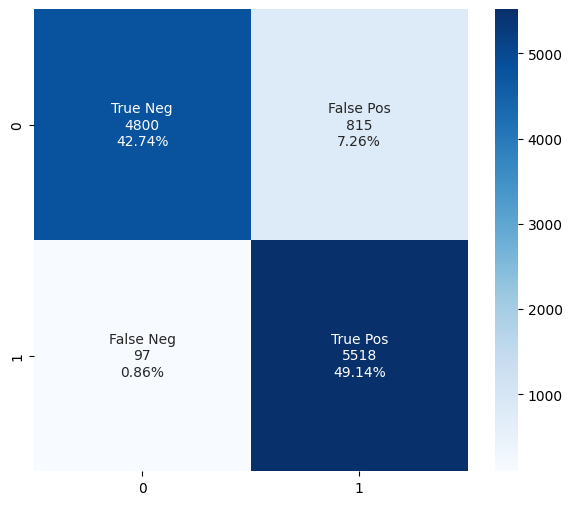

In [87]:
cf = confusion_matrix(y_test, final_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(x) for x in cf.flatten()]
group_percentages = ["{0:.2%}".format(x) for x in cf.flatten()/np.sum(cf)]

labels = [f"{name}\n{count}\n{percent}"
          for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(7,6))
sns.heatmap(cf, annot=labels, fmt="", cmap="Blues")
plt.show()


**13. Test with Custom Examples**

In [98]:
samples = [

    "Urgent hireing! Ern ₹80,000 per week frm home. No experiance needed. Clik link fast.",

    "Ez typng job. Ern ₹5000 daliy. Only requirmnt pay actvation fe.",

    "Part time job availble! No intervw needed. Pay ₹800 registation fee to activat your acount.",

    "We are hiring a software engineer with experience in Java, Spring Boot, and REST APIs. Minimum 2 years required.",

    "Looking for a data analyst for our Bangalore office. Candidates must have strong skills in SQL, Excel, and reporting dashboards.",

    "We need a front desk receptionist for a hotel in Mumbai. Good communication and customer-facing skills are mandatory.",

    "Urgent hireing! Earn ₹90,000 per week from home. No experiance needed. Clik the link to start immediately.",

    "We are looking for a network administrator with experience in Linux servers, firewall configuration, and troubleshooting. Full-time position in Pune.",

    "Hiring a content writer for our marketing team. Candidates must have strong English writing skills and 1–2 years of experience in SEO content creation.",

    "Congratulation! You selekted for high paying job. To activat your posishun send ₹699 verifcation fe now!",

    "Easy online work!!! Earn ₹70,000 every week just by completing surveys. No experiance needed. Register by paying small ₹499 fee.",

]



clean_samples = [clean_text(x) for x in samples]
sample_count = count_vectorizer.transform(clean_samples)
sample_full = hstack([sample_count, np.zeros((len(samples),3))])

sample_pred = nb.predict(sample_full)

for text, p in zip(samples, sample_pred):
    print("\nTEXT:", text)
    print("PREDICTION:", "FAKE JOB" if p == 1 else "REAL JOB")



TEXT: Urgent hireing! Ern ₹80,000 per week frm home. No experiance needed. Clik link fast.
PREDICTION: FAKE JOB

TEXT: Ez typng job. Ern ₹5000 daliy. Only requirmnt pay actvation fe.
PREDICTION: FAKE JOB

TEXT: Part time job availble! No intervw needed. Pay ₹800 registation fee to activat your acount.
PREDICTION: FAKE JOB

TEXT: We are hiring a software engineer with experience in Java, Spring Boot, and REST APIs. Minimum 2 years required.
PREDICTION: REAL JOB

TEXT: Looking for a data analyst for our Bangalore office. Candidates must have strong skills in SQL, Excel, and reporting dashboards.
PREDICTION: REAL JOB

TEXT: We need a front desk receptionist for a hotel in Mumbai. Good communication and customer-facing skills are mandatory.
PREDICTION: REAL JOB

TEXT: Urgent hireing! Earn ₹90,000 per week from home. No experiance needed. Clik the link to start immediately.
PREDICTION: FAKE JOB

TEXT: We are looking for a network administrator with experience in Linux servers, firewall con